In [2]:
# Load packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6) 

Populating the interactive namespace from numpy and matplotlib


In [3]:
# to customize the displayed area of the dataframe 
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [4]:
df           = pd.read_csv("C:\\Users\\student12\\Desktop\\Santander\\train_ver2.csv",
                           dtype={"sexo":str, "ind_nuevo":str, 
                                  "ult_fec_cli_1t":str, 
                                  "indext":str}, nrows=7e6) 

unique_ids   = pd.Series(df["ncodpers"].unique())
unique_id    = unique_ids.sample(n=1.3e5)
df           = df[df.ncodpers.isin(unique_id)]

C:\Users\student12\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\student12\Anaconda2\lib\site-packages\pandas\core\generic.py:2572: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  locs = rs.choice(axis_length, size=n, replace=replace, p=weights)


In [5]:
# Change datatype
df["age"]   = pd.to_numeric(df["age"], errors="coerce") 
df["antiguedad"]   = pd.to_numeric(df["antiguedad"], errors="coerce") 
df["indrel_1mes"]   = pd.to_numeric(df["indrel_1mes"], errors="coerce") 

In [6]:
# Drop the columns with majority of missing values
df = df.drop(["ult_fec_cli_1t", "conyuemp"], axis=1) 

In [7]:
#Impute missing values in the income column 
grouped        = df.groupby("nomprov").agg({"renta":lambda x: x.median(skipna=True)}).reset_index()
new_incomes    = pd.merge(df,grouped,how="inner",on="nomprov").loc[:, ["nomprov","renta_y"]]
new_incomes    = new_incomes.rename(columns={"renta_y":"renta"}).sort_values("renta").sort_values("nomprov")
df.sort_values("nomprov",inplace=True)
df             = df.reset_index()
new_incomes    = new_incomes.reset_index()

df.loc[df.renta.isnull(),"renta"] = new_incomes.loc[df.renta.isnull(),"renta"].reset_index()
df.loc[df.renta.isnull(),"renta"] = df.loc[df.renta.notnull(),"renta"].median()
df.sort_values(by="fecha_dato",inplace=True)

In [8]:
df = df.dropna(axis=0)

In [9]:
df[df["antiguedad"]<0] = 0

In [10]:
# Add a new column of the total number of products per customer per month
df["tot_products"] = df.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)
df["tot_products"]   = pd.to_numeric(df["tot_products"], errors="coerce")

In [11]:
df = df.loc[lambda df: df.pais_residencia == "ES", :]

In [12]:
df = df.loc[lambda df: df.ind_empleado == "N", :]

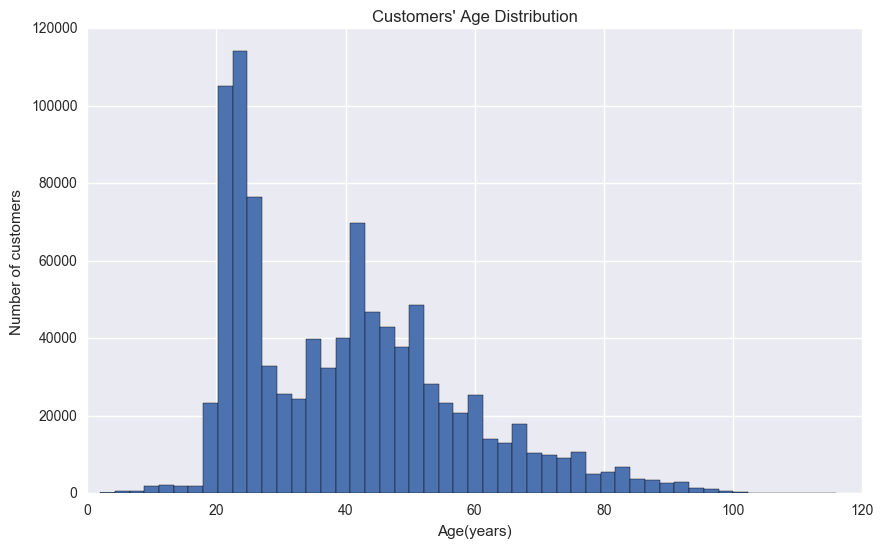

In [13]:
df['age'].hist(bins=50)
plt.title("Customers' Age Distribution")
plt.xlabel("Age(years)")
plt.ylabel("Number of customers") 

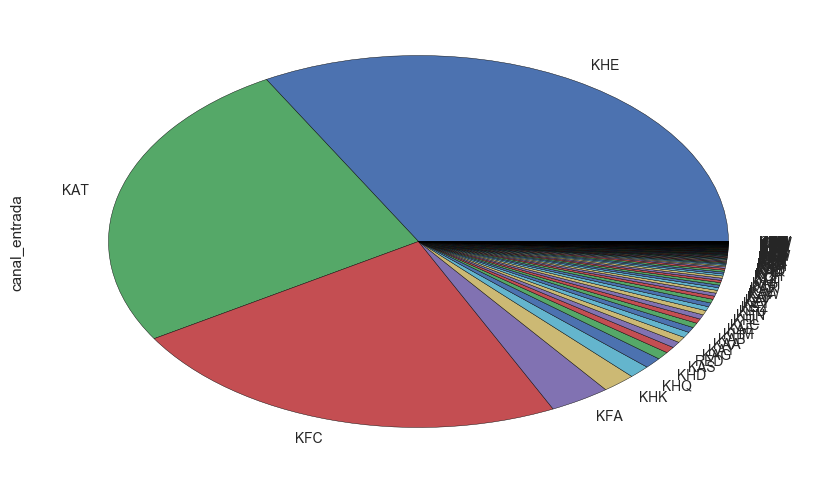

In [14]:
df["canal_entrada"].value_counts().plot(x=None, y=None, kind='pie')
#shows that most customers have joined through 3 main channels.

In [15]:
df_a = df.loc[:, ['sexo', 'ind_actividad_cliente']].join(df.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
df_a = df_a.groupby(['sexo', 'ind_actividad_cliente']).sum()
df_a = df_a.T

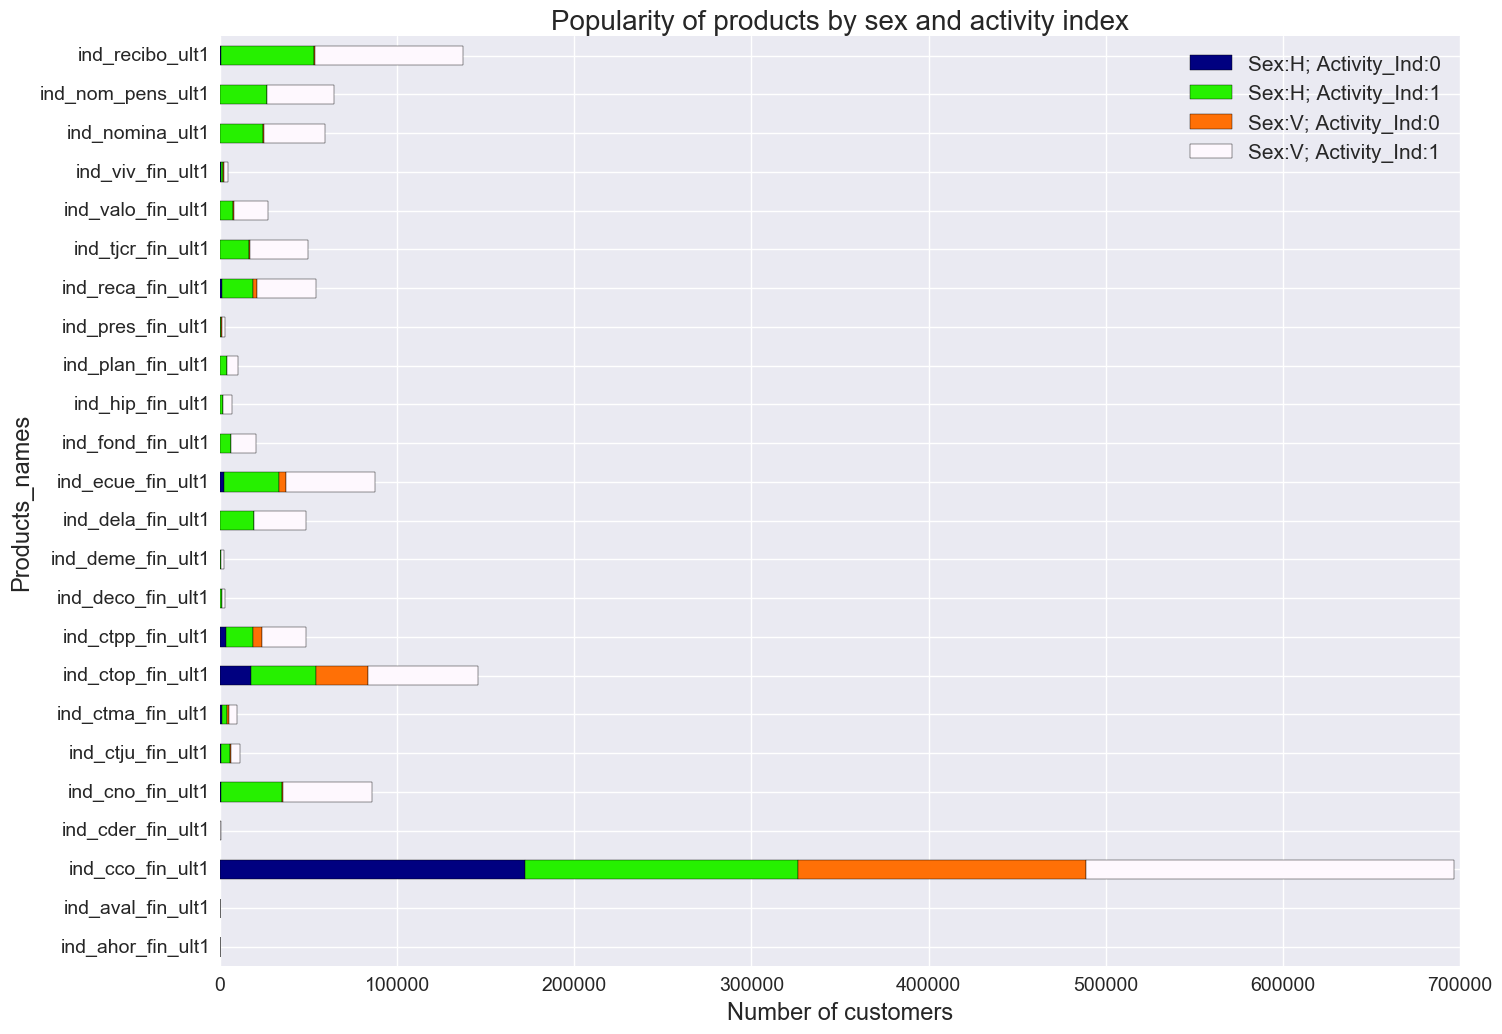

In [16]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by sex and activity index', fontsize=20) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':15}) 

In [17]:
# excluding the dominant product 
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

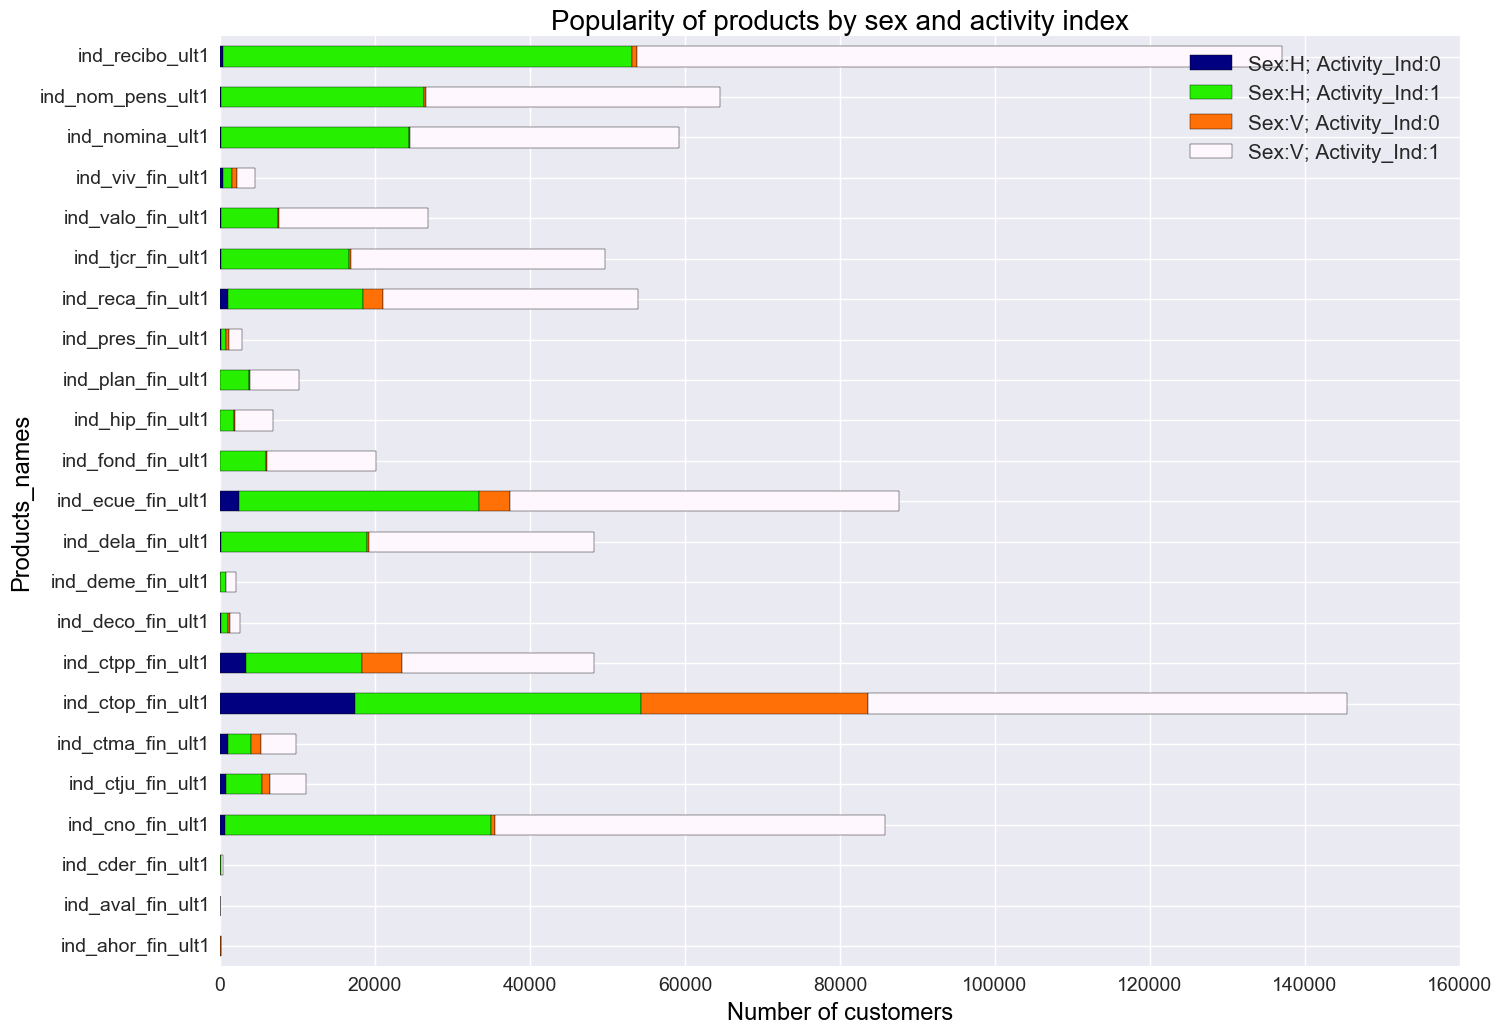

In [18]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by sex and activity index', fontsize=20, color='black') 
plt.xlabel('Number of customers', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':15}) 

In [19]:
df_a = df.groupby(['age'])['tot_products'].agg('sum')

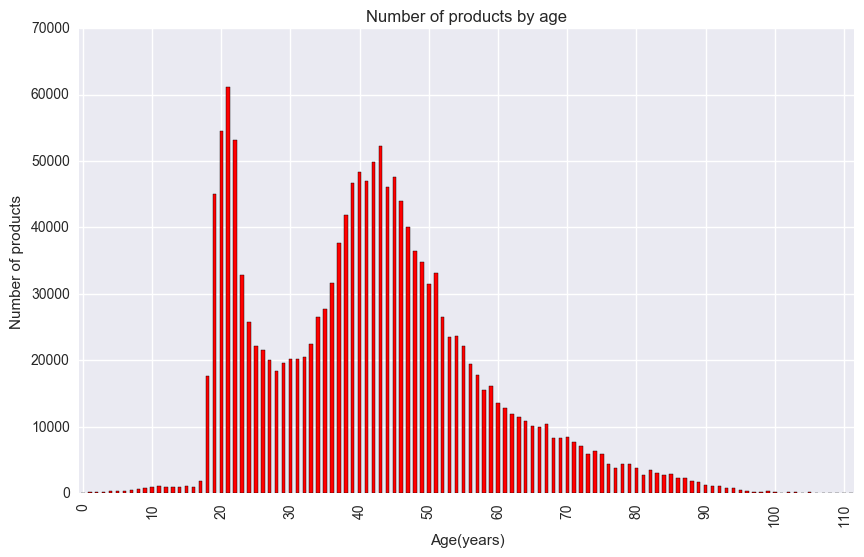

In [20]:
# Number of products by age 
df_a.plot(kind='bar', colormap='autumn', legend=None) 
plt.xticks(np.arange(0, 120, 10), [str(x) for x in np.arange(0, 120, 10)])
plt.title('Number of products by age') 
plt.xlabel('Age(years)') 
plt.ylabel('Number of products') 

In [21]:
df_a = (df.groupby(pd.cut(df['renta'], [0,60000,120000,180000,240000, pd.np.inf], right=False))
                     .sum())

In [22]:
# Let's drop the columns which are unnecessary for this step
df_a = df_a.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
df_a = df_a.T

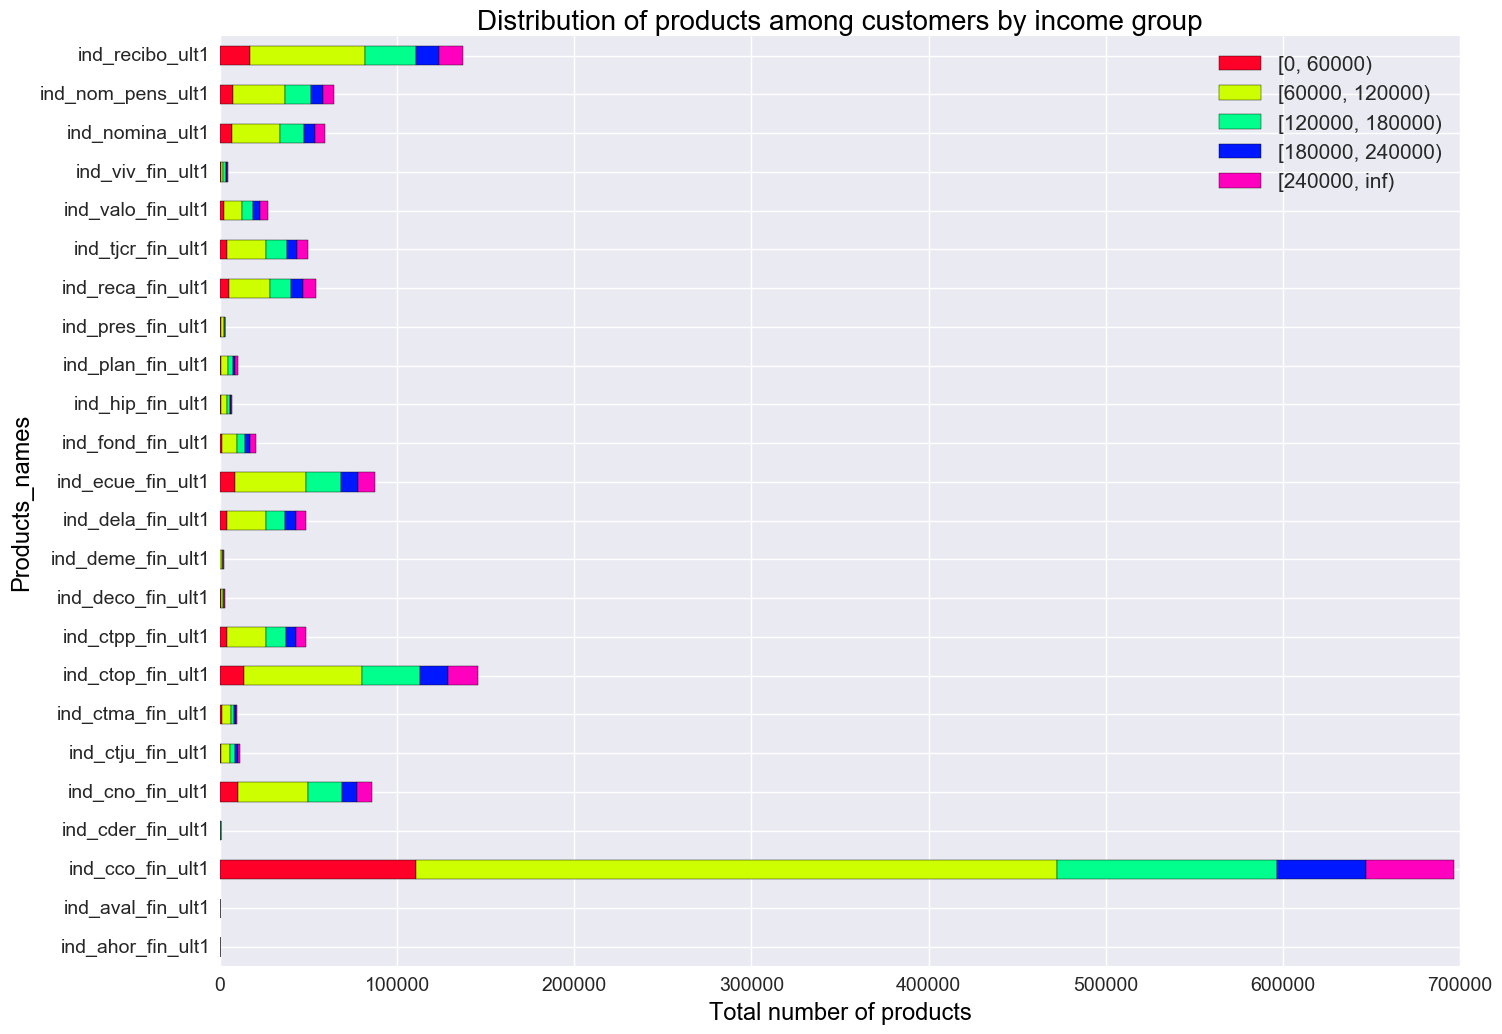

In [23]:
# Plot of product share for each income group
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Distribution of products among customers by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

In [24]:
# exclude the dominant product "ind_cco_fin_ult1"
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

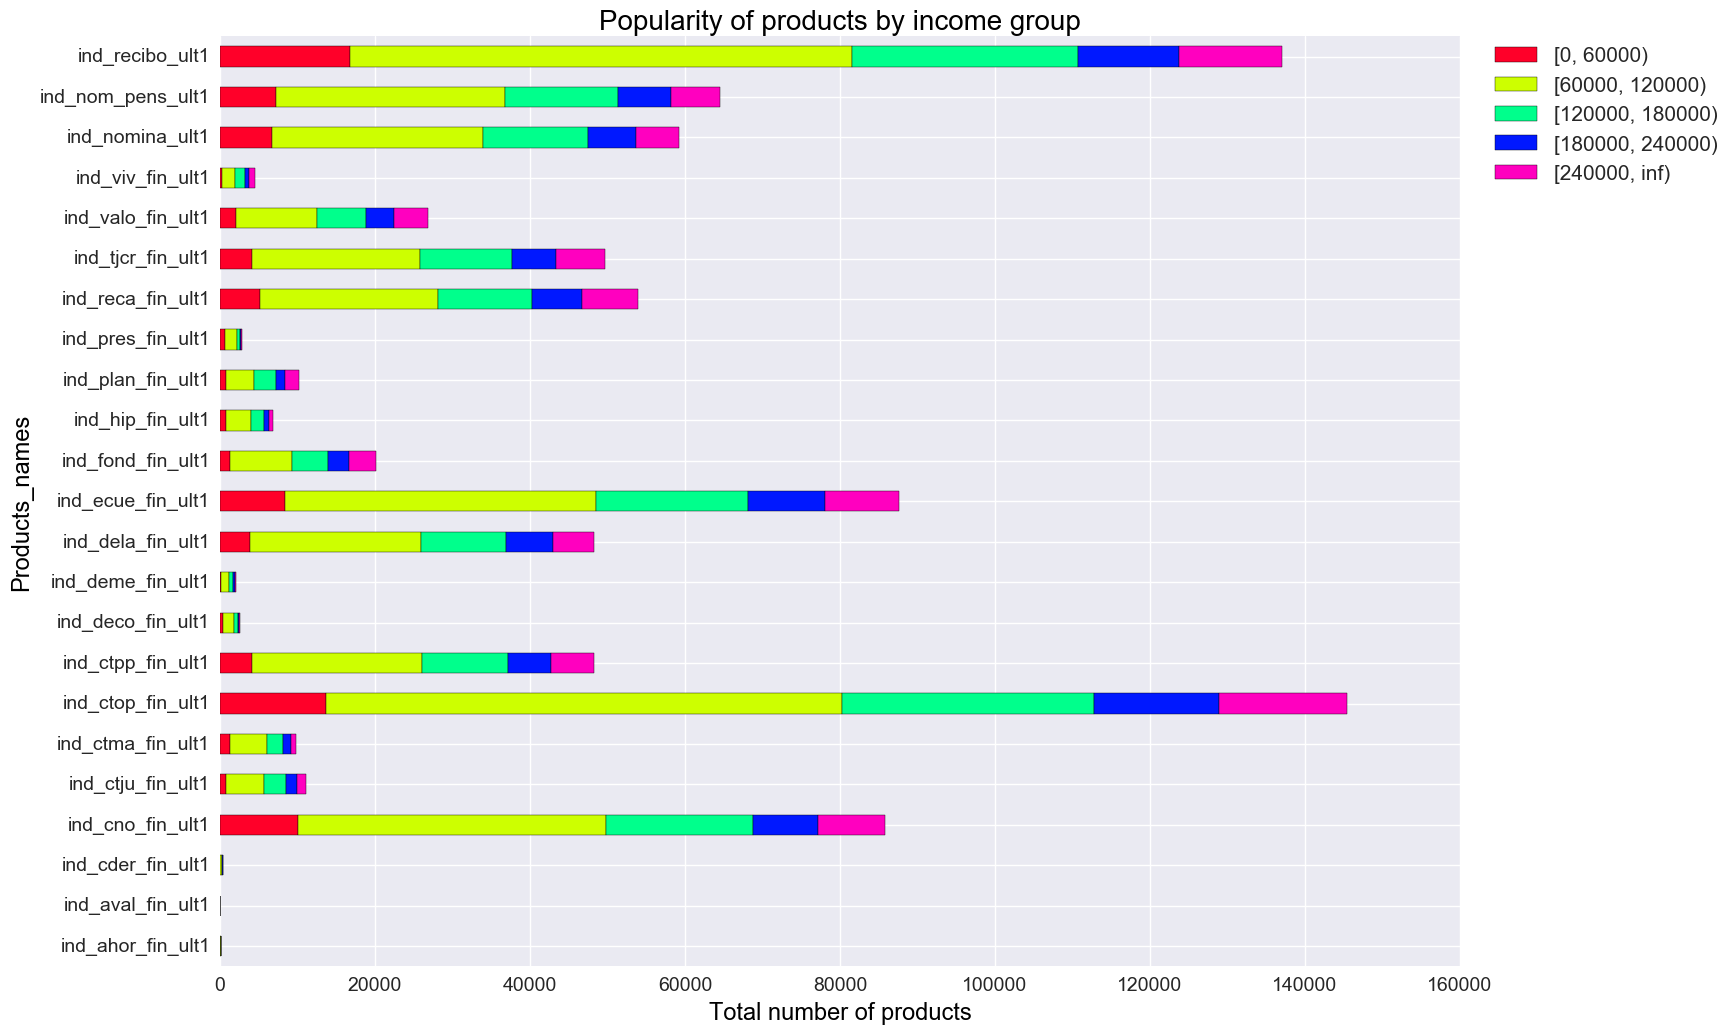

In [25]:
# Plot of product share for each income group; excluding the dominant product 
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Popularity of products by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15}) 

In [26]:
# Let's create age groups
df_a = (df.groupby(pd.cut(df['age'], [0,20,40,60,80,100, pd.np.inf], right=False))
                     .sum())

In [27]:
# Keep the products columns and discard the others
df_a = df_a.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
df_a = df_a.T

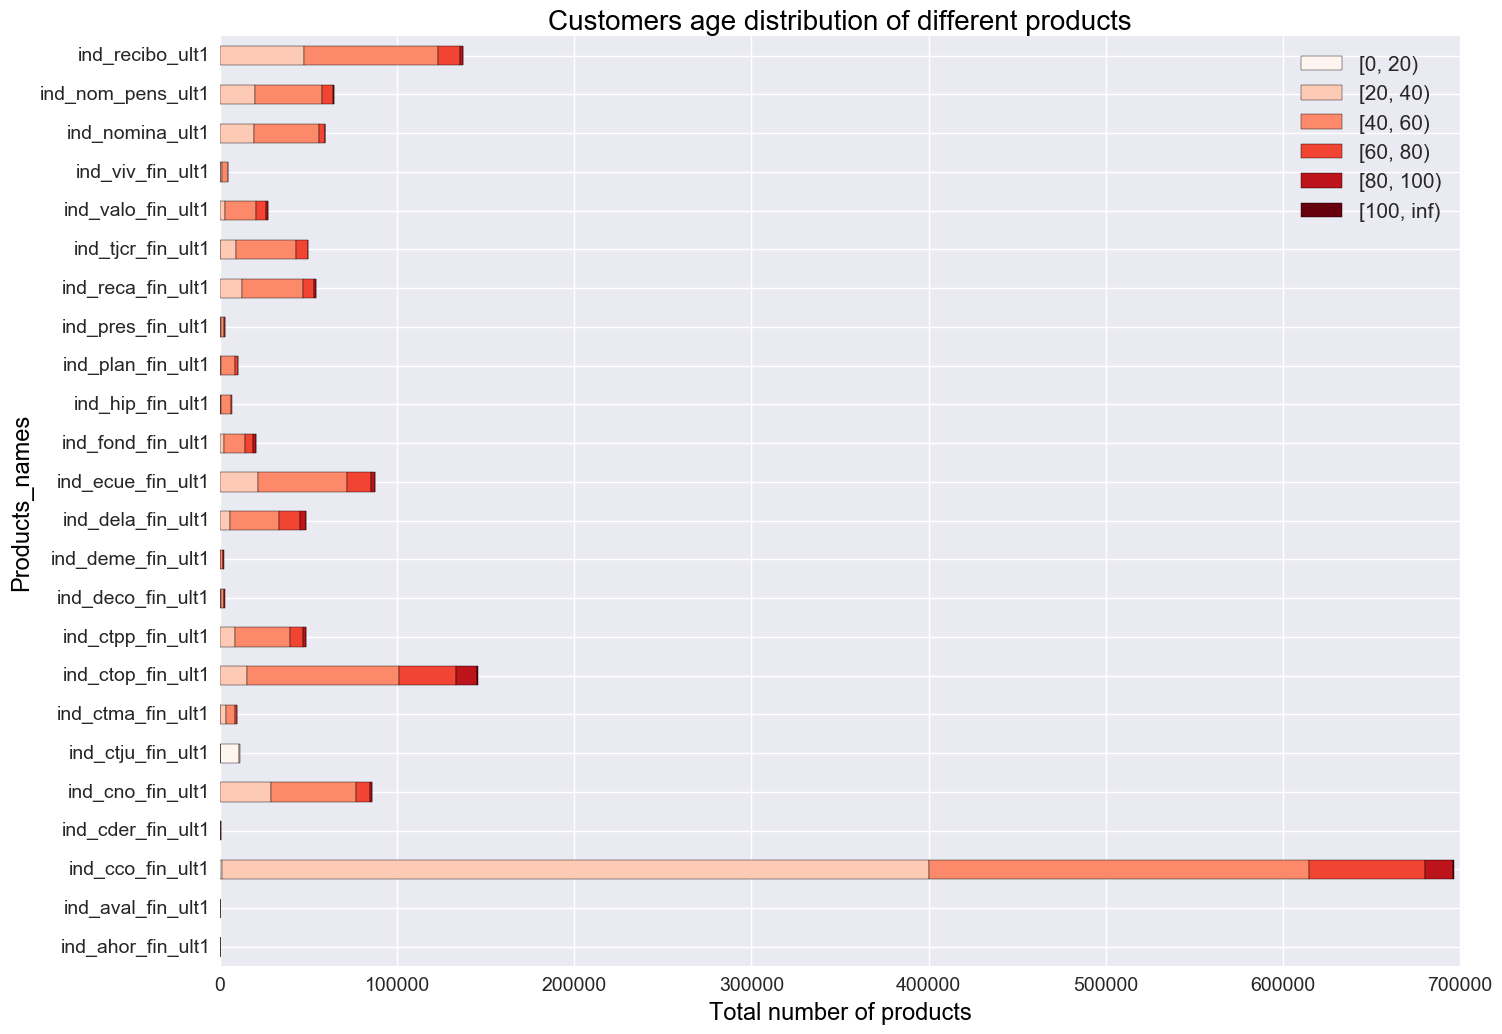

In [28]:
# Plot of customers' age distibution of each product 
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='Reds')
plt.title('Customers age distribution of different products', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

In [29]:
# exclude the dominant product "ind_cco_fin_ult1"
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

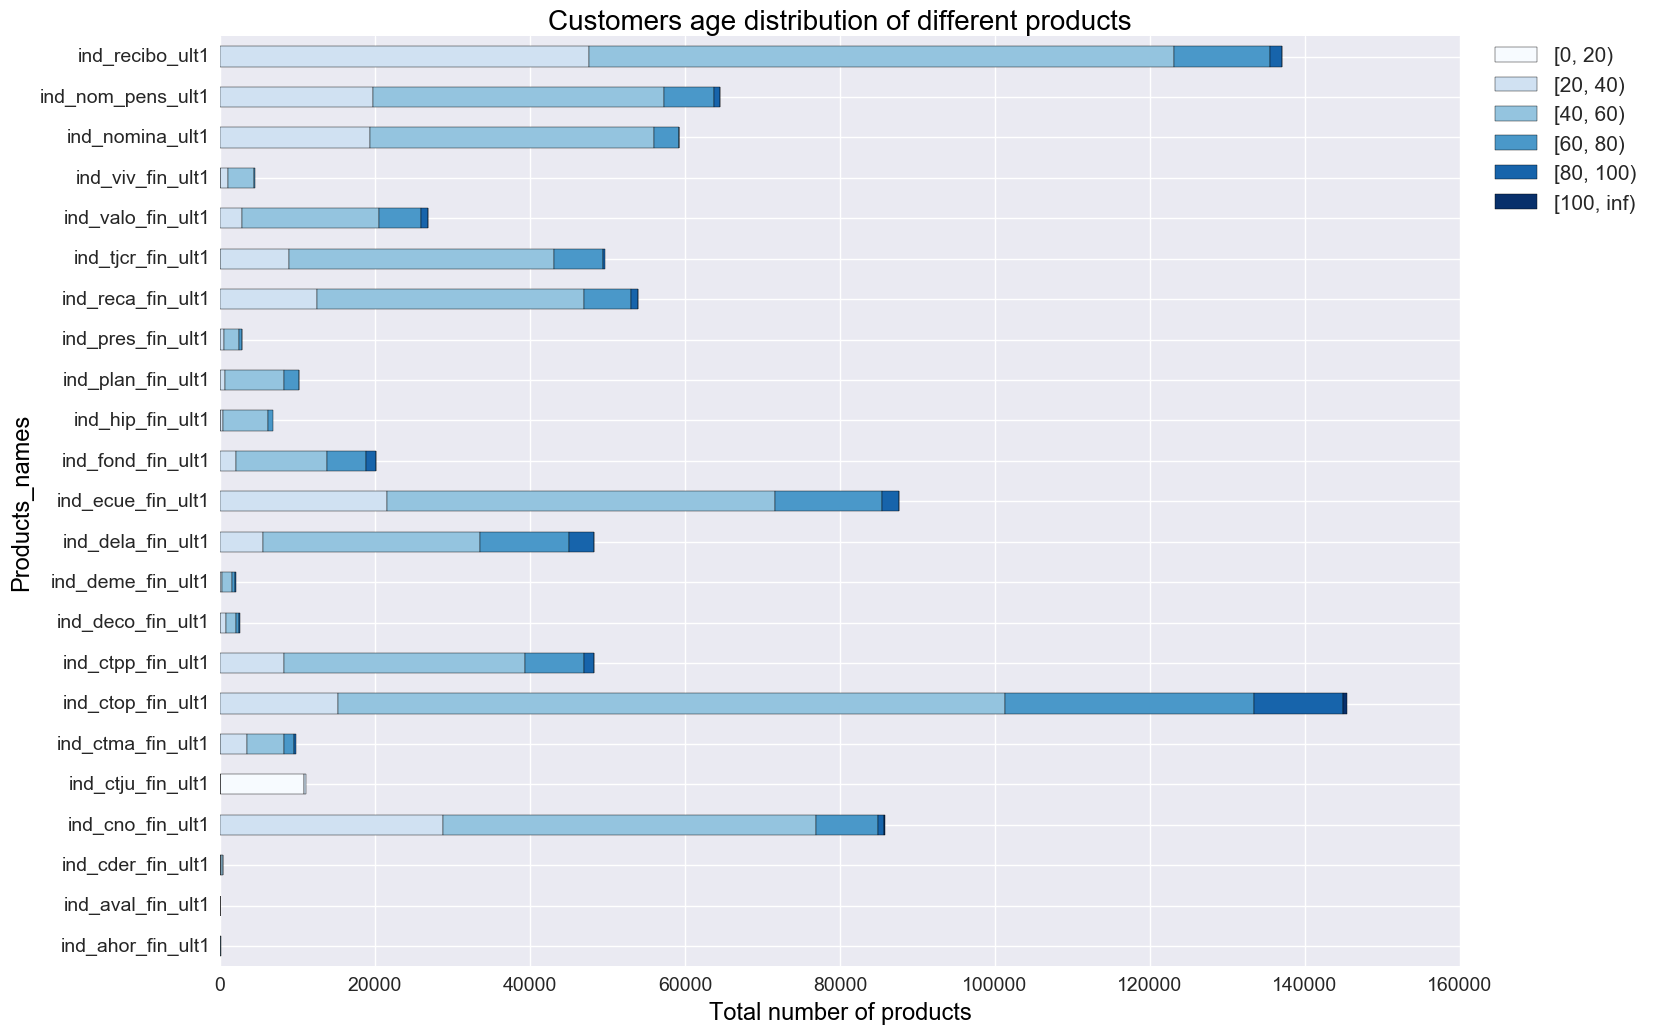

In [30]:
# Plot of customers' age distibution of each product (excluding the dominant product) 
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='Blues')
plt.title('Customers age distribution of different products', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15}) 

In [31]:
df_a = df.loc[:, ['age']].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

In [32]:
df_a = (df_a.groupby(pd.cut(df_a['age'], [0,18,25,35,45,55, pd.np.inf], right=False))
                     .sum())

In [33]:
del df_a["age"]

In [34]:
df_a = df_a.T

In [35]:
df_a = df.loc[:,["age"]].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

In [36]:
fnc = {c:'sum' for c in df_a.columns.drop(['age']).tolist()}
     ...: fnc['age'] = 'mean'
     ...: 

In [37]:
df_a = df_a.groupby('age').agg(fnc).reindex_axis(df_a.columns.drop('age'), 1) 

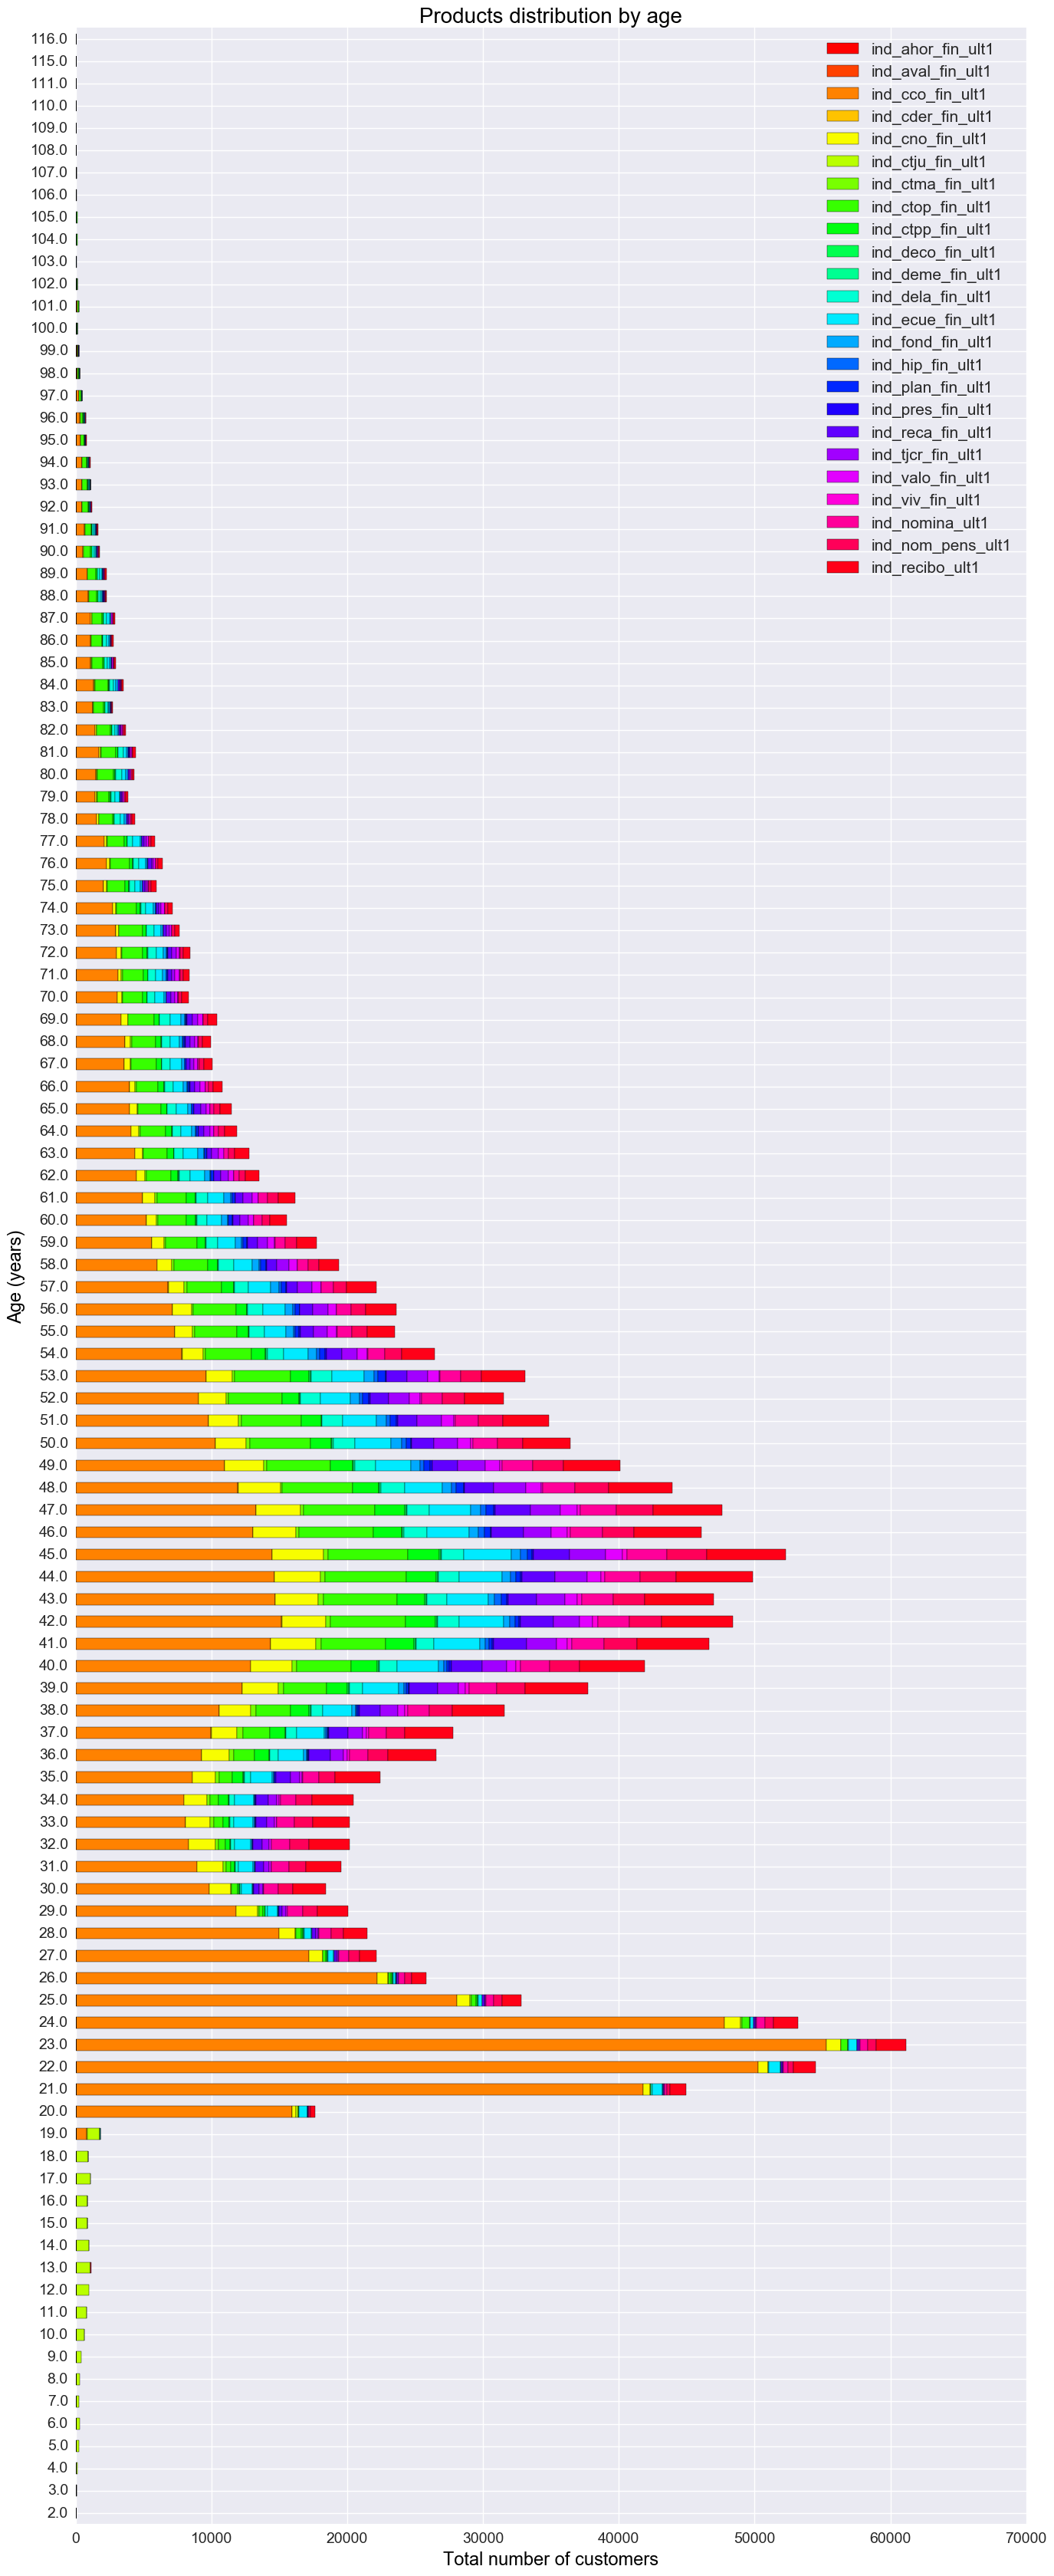

In [39]:
# Products distribution by age
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,42], colormap='hsv')
plt.title('Products distribution by age', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Age (years)', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 